In [1]:
import tensorflow as tf

## Loading MNIST Dataset

In [2]:
mnist = tf.keras.datasets.mnist

## Divide into Train and Test dataset

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
x_train.shape

(60000, 28, 28)

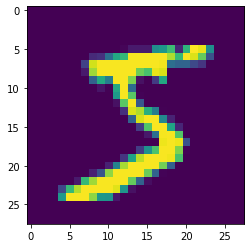

5

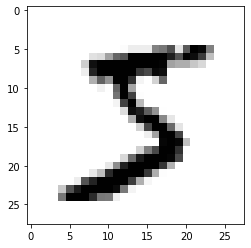

In [5]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
plt.show()
plt.imshow(x_train[0],cmap=plt.cm.binary)
y_train[0]

## Checking value of each pixel

In [6]:
print(x_train[0]) #shows the color values

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

## Noramalizing the data | Pre-processing Step

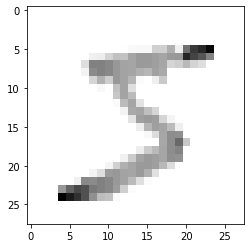

In [7]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)
plt.imshow(x_train[0],cmap=plt.cm.binary)

In [8]:
print(x_train[0]) #all the values are from zero to one

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

## Resizing image to make it suitable for applying Convolution operation

In [9]:
import numpy as np
IMG_SIZE=28
X_train = np.array(x_train).reshape(-1, IMG_SIZE, IMG_SIZE, 1) #increasing one dimension for kernal operation
X_test = np.array(x_test).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
print("Training sample dimensions:",X_train.shape)
print("Testing sample dimensions:",X_test.shape)

Training sample dimensions: (60000, 28, 28, 1)
Testing sample dimensions: (10000, 28, 28, 1)


# Creating a deep neural network
### Training on 60000 MNIST Dataset

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D


In [11]:
model = Sequential()

#1st Convolutional Layer
model.add(Conv2D(64, (3,3), input_shape=X_train.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

#2nd Convolutional Layer
model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

#3rd Convolutional Layer
model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
          
#Fully Connected Layer #1
model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))
          
#Fully Connected Layer #2
model.add(Flatten())
model.add(Dense(32))
model.add(Activation("relu"))
          
#Fully Connected Layer #1
model.add(Flatten())
model.add(Dense(10))
model.add(Activation("softmax"))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 activation (Activation)     (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 activation_1 (Activation)   (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                    

In [13]:
print("Total training sample =",len(X_train))
print(len(y_train))

Total training sample = 60000
60000


In [14]:
model.compile(loss="sparse_categorical_crossentropy", optimizer = "adam", metrics=['accuracy'])

In [15]:
model.fit(X_train, y_train, epochs=5, verbose=1, batch_size = 1, validation_data=(X_test, y_test))

Epoch 1/5
60000/60000 [==============================] - 92s 2ms/step - loss: 0.2025 - accuracy: 0.9409 - val_loss: 0.0908 - val_accuracy: 0.9742
Epoch 2/5
60000/60000 [==============================] - 93s 2ms/step - loss: 0.1168 - accuracy: 0.9706 - val_loss: 0.0971 - val_accuracy: 0.9759
Epoch 3/5
60000/60000 [==============================] - 93s 2ms/step - loss: 0.1093 - accuracy: 0.9721 - val_loss: 0.0948 - val_accuracy: 0.9777
Epoch 4/5
60000/60000 [==============================] - 93s 2ms/step - loss: 0.1087 - accuracy: 0.9731 - val_loss: 0.1429 - val_accuracy: 0.9622
Epoch 5/5
60000/60000 [==============================] - 94s 2ms/step - loss: 0.1048 - accuracy: 0.9756 - val_loss: 0.1381 - val_accuracy: 0.9621


In [16]:
#Evaluating on testing dataset
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print("Test Loss on 10000 test samples=",test_loss)
print("Validation Accuracy on 10000 test samples=",test_acc)

Test Loss on 10000 test samples= 0.13806340098381042
Validation Accuracy on 10000 test samples= 0.9621000289916992


In [17]:
predictions = model.predict([X_test])
print(predictions)

[[4.1787335e-21 6.0932634e-11 5.1941634e-10 ... 9.9999952e-01
  7.0645094e-11 4.3320190e-07]
 [6.6366732e-07 1.8180137e-10 9.9900287e-01 ... 6.3505897e-04
  3.8296307e-06 3.5299699e-08]
 [9.9584689e-12 9.9999988e-01 4.2258592e-12 ... 1.5817783e-07
  1.8070072e-09 6.4760064e-09]
 ...
 [2.2124979e-11 4.7371537e-11 3.2335457e-08 ... 1.5891310e-08
  7.4928554e-05 3.9856794e-04]
 [5.7930999e-12 6.2072838e-19 2.5441570e-23 ... 2.4865193e-13
  3.3469730e-13 9.3068316e-08]
 [1.7384058e-02 1.4145767e-06 6.6277521e-06 ... 4.3986101e-10
  6.2947290e-04 1.1793773e-04]]


7


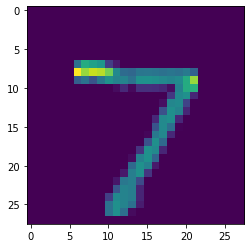

In [18]:
print(np.argmax(predictions[0])) #argmax will return the maximum value index and find the value of it
plt.imshow(x_test[0]) #check if answer is right or wrong

0


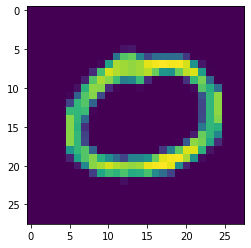

In [19]:
print(np.argmax(predictions[69])) #argmax will return the maximum value index and find the value of it
plt.imshow(X_test[69]) #check if answer is right or wrong

## Predicting from my own image

In [20]:
import cv2

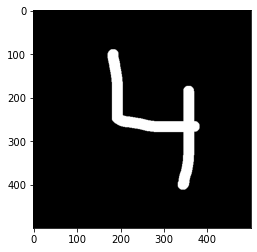

In [21]:
img = cv2.imread("res\\4.png")
plt.imshow(img)

In [22]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) #convert to gray image
resized = cv2.resize(gray, (28,28), interpolation=cv2.INTER_AREA) #resize the image

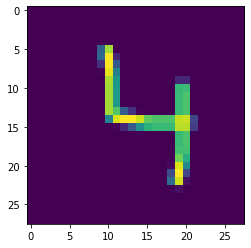

In [23]:
resized.shape #it is 28x28 now
plt.imshow(resized)

In [24]:
newimg = tf.keras.utils.normalize(resized, axis=1) #normalizing
newimg = np.array(newimg).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
newimg.shape

(1, 28, 28, 1)

In [25]:
predictions = model.predict(newimg)

In [26]:
print(predictions)
print(np.argmax(predictions))

[[0.00000000e+00 8.98891598e-21 1.50375165e-22 6.54110025e-37
  1.00000000e+00 5.25455849e-37 2.60114885e-27 1.03281425e-23
  2.94061383e-20 1.00327784e-16]]
4


In [27]:
model.save("model")

INFO:tensorflow:Assets written to: model\assets
